In [ ]:
import numpy as np
import pandas as pd

In [ ]:
tags= pd.read_csv('tags_output2.csv')

In [ ]:
movie_rat= pd.read_csv('movie_rating.csv')

In [ ]:
tags= tags.merge(movie_rat, how='left', on='movieId')
tags= tags[['userId', 'movieId','rating', 'n_of_ratings', 'tag', 'tag_tokens', 'tag_nsw', 'tag_lemm',
       'tag_pos_tags']]
tags.sample(5)

,userId,movieId,rating,n_of_ratings,tag,tag_tokens,tag_nsw,tag_lemm,tag_pos_tags
538,193,4878,3.981651,109,psychological,['psychological'],['psycholog'],['psychological'],"[('psychological', 'JJ')]"
422,119,115149,3.844828,29,action,['action'],['action'],['action'],"[('action', 'NN')]"
1013,474,45,3.312500,32,journalism,['journalism'],['journal'],['journalism'],"[('journalism', 'NN')]"
98,62,6541,2.625000,32,peta wilson,"['peta', 'wilson']","['peta', 'wilson']","['peta', 'wilson']","[('peta', 'NN'), ('wilson', 'NN')]"
2448,474,33660,4.088235,17,boxing,['boxing'],['box'],['boxing'],"[('boxing', 'NN')]"


In [ ]:
tags['rating_class'] = (tags['rating']).round()
tags['rating_class']=tags['rating_class'].astype(int)
ratings=tags['rating_class']

In [ ]:
df=tags
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['tag_tokens'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b')
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df = pd.concat([df, tfidf_df], axis=1)


In [ ]:
tfidf_matrix

<3683x26 sparse matrix of type '<class 'numpy.float64'>'
	with 27363 stored elements in Compressed Sparse Row format>

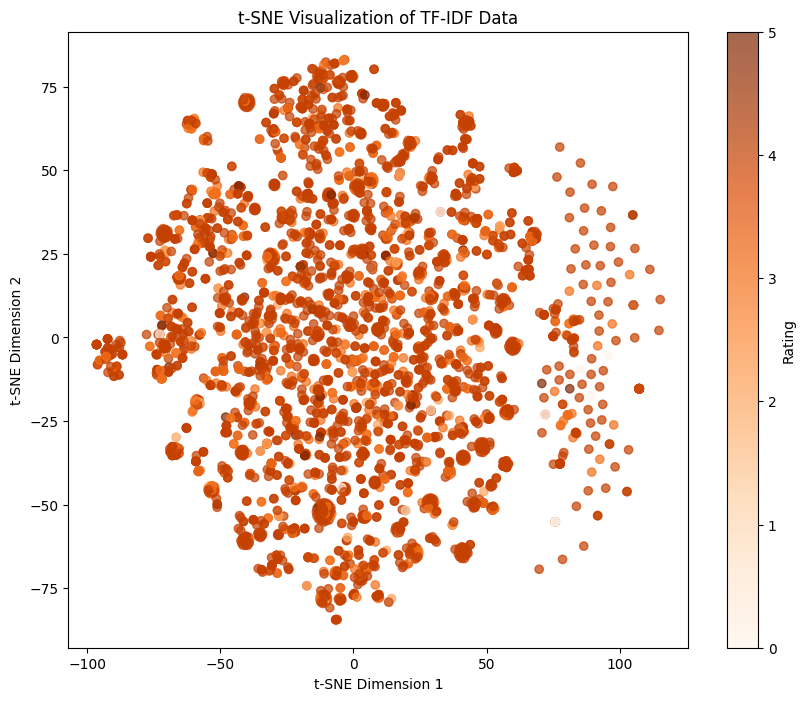

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

dense_tfidf_matrix = tfidf_matrix.toarray()

tsne = TSNE(n_components=2, random_state=42)
tsne_matrix = tsne.fit_transform(dense_tfidf_matrix)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=df['rating_class'], cmap='Oranges', alpha=0.7)
plt.colorbar(scatter, label='Rating')
plt.title('t-SNE Visualization of TF-IDF Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()



Agruppamenti di Punti:

I punti (rappresentanti i film) che sono vicini tra loro nel grafico tendono ad avere profili TF-IDF simili. Gli aggregati possono indicare gruppi di film che condividono temi o caratteristiche comuni.
Isolamento di Punti:

I punti isolati possono rappresentare casi eccezionali o film che hanno profili TF-IDF unici rispetto al resto del dataset.
Gradiente di Colori:

Se hai colorato i punti in base alla feature 'rating', puoi osservare se c'è correlazione tra la distribuzione spaziale dei punti e i loro voti. Ad esempio, i film altamente votati si raggruppano insieme?
Densità di Punti:

La concentrazione o densità di punti in determinate aree del grafico indica regioni in cui potrebbero esistere maggiori similarità o pattern nei dati.
Struttura Complessiva:

La struttura generale del grafico può rivelare le relazioni globali all'interno dei dati. Presta attenzione alla disposizione generale e ai pattern che emergono.
Ricorda che t-SNE è una tecnica di riduzione della dimensionalità non lineare e le distanze tra i punti nel grafico non rappresentano necessariamente le distanze assolute nello spazio originale ad alta dimensionalità. Si tratta più di preservare le relazioni locali.

L'interpretazione dei grafici t-SNE spesso implica un'analisi qualitativa, e le intuizioni specifiche dipendono dalle caratteristiche del tuo dataset e dalle feature utilizzate per la visualizzazione. L'obiettivo è identificare pattern e tendenze che possano guidare ulteriori esplorazioni e analisi dei dati.

Explained variation per component: [0.01975118 0.0896584  0.07085127]


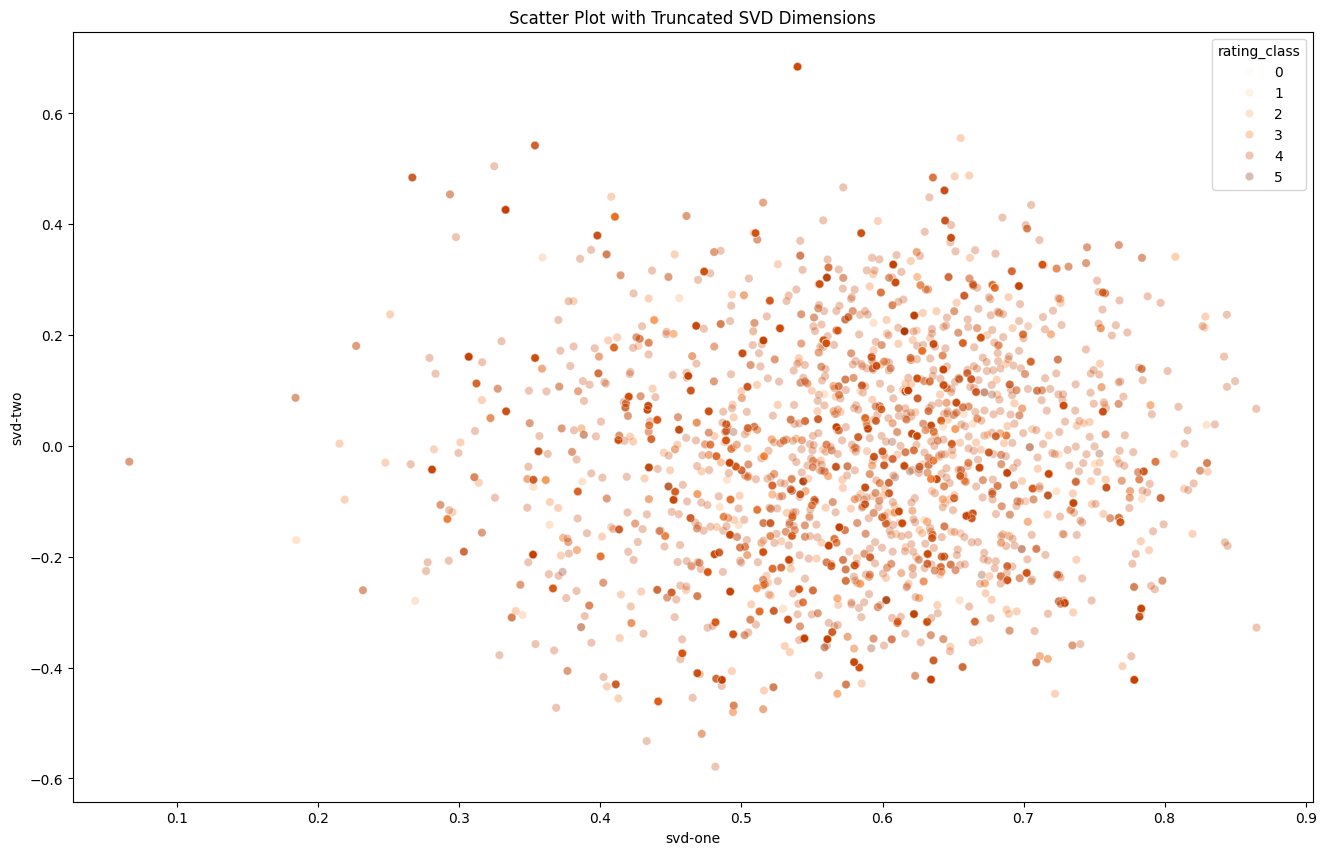

In [ ]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt

feat_cols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


for col in feat_cols:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame.")


truncatedSVD = TruncatedSVD(n_components=3)
svd_result = truncatedSVD.fit_transform(df[feat_cols].values)
df['svd-one'] = svd_result[:, 0]
df['svd-two'] = svd_result[:, 1]
df['svd-three'] = svd_result[:, 2]

print('Explained variation per component: {}'.format(truncatedSVD.explained_variance_ratio_))

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="svd-one", y="svd-two",
    hue="rating_class",
    palette=sns.color_palette("Oranges", as_cmap=True),
    data=df,
    legend="full",
    alpha=0.3
)

plt.title('Scatter Plot with Truncated SVD Dimensions')
plt.show()


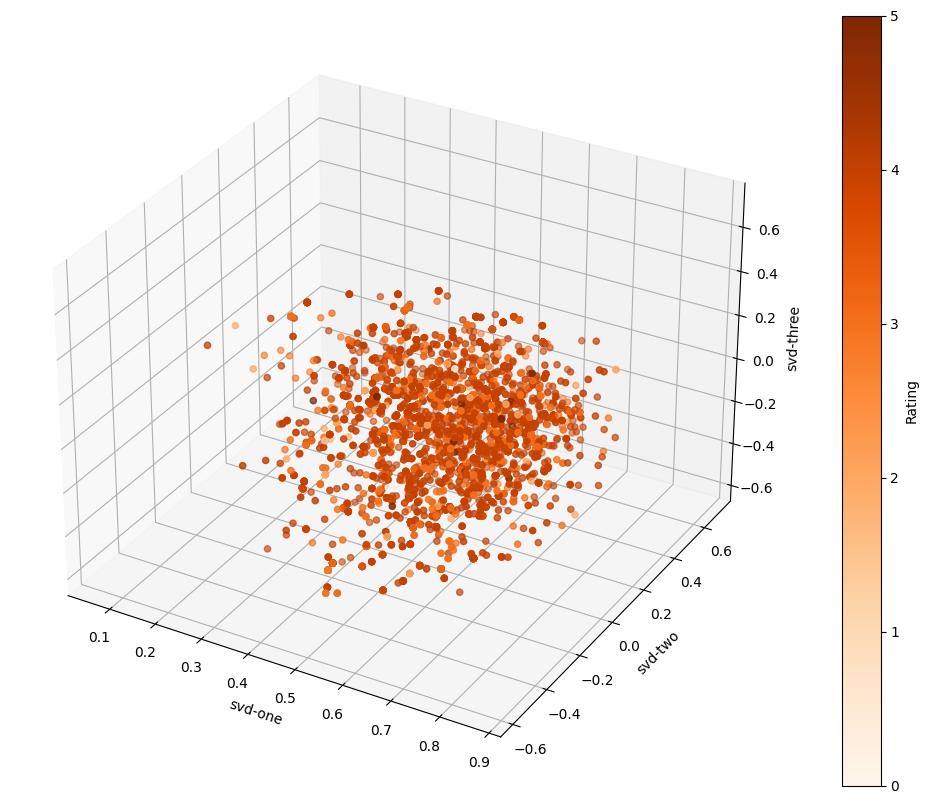

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


feat_cols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


for col in feat_cols:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame.")


truncatedSVD = TruncatedSVD(n_components=3)
svd_result = truncatedSVD.fit_transform(df[feat_cols].values)
df['svd-one'] = svd_result[:, 0]
df['svd-two'] = svd_result[:, 1]
df['svd-three'] = svd_result[:, 2]

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    xs=df["svd-one"],
    ys=df["svd-two"],
    zs=df["svd-three"],
    c=df["rating_class"],
    cmap='Oranges'
)

ax.set_xlabel('svd-one')
ax.set_ylabel('svd-two')
ax.set_zlabel('svd-three')


cbar = fig.colorbar(scatter)
cbar.set_label('Rating')

plt.show()



Un grafico a dispersione tridimensionale ottenuto attraverso Truncated SVD rappresenta la distribuzione di punti nel tuo spazio ridotto a tre dimensioni. Ecco come puoi interpretare il grafico:

Asse x, y, e z:

Gli assi x, y e z rappresentano le tre dimensioni ottenute attraverso la riduzione della dimensionalità con Truncated SVD. Ciascun punto nel grafico è posizionato in base ai suoi valori su queste dimensioni ridotte.
Colore dei Punti:

I punti sono colorati in base al valore della colonna 'rating'. In questo caso, la scala dei colori (la barra laterale) mostra come i valori di 'rating' corrispondano ai colori. Ad esempio, potrebbe essere che i punti più chiari rappresentino valutazioni più alte, mentre i punti più scuri rappresentano valutazioni più basse.
Distanza tra i Punti:

La distanza tra i punti nello spazio tridimensionale rappresenta le differenze nelle caratteristiche del tuo dataset. Punti vicini indicano film con profili simili, mentre punti distanti indicano film con caratteristiche più divergenti.
Concentrazione di Punti:

Le regioni più dense di punti possono indicare cluster o gruppi di film con attributi simili. Se vedi un'area in cui i punti sono particolarmente concentrati, potrebbe suggerire che quei film condividono caratteristiche comuni.
Variabilità delle Dimensioni:

Puoi osservare quanto le dimensioni ridotte (svd-one, svd-two, svd-three) catturino la variabilità del tuo dataset. L'Explained variation per component stampato nel terminale fornisce informazioni sulla quantità di varianza spiegata da ciascuna dimensione.
In sintesi, il grafico tridimensionale mostra una rappresentazione visiva delle relazioni e delle differenze tra i film nel tuo dataset in base alle dimensioni ridotte da Truncated SVD.

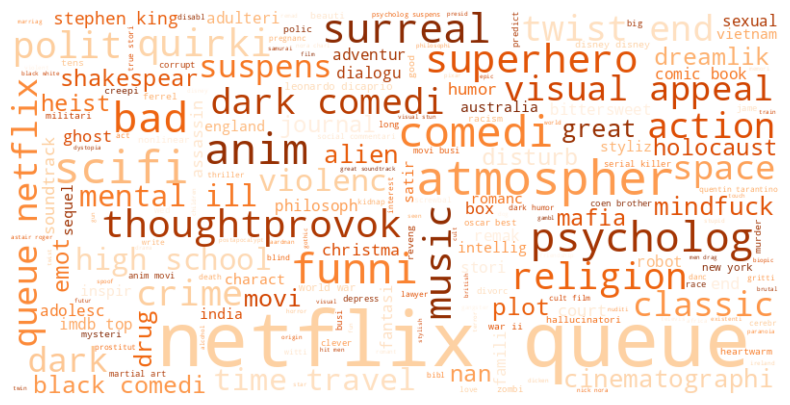

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


all_tags_nsw = ' '.join(df['tag_nsw'].apply(eval).explode().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='Oranges').generate(all_tags_nsw)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
